<a href="https://colab.research.google.com/github/rotimi2020/A-Model-a-Day/blob/master/Cancer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from sklearn import datasets
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,MaxPool1D,Conv1D,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
iris=datasets.load_breast_cancer()

In [ ]:
x=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [ ]:
x. head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y=iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
x.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
x.shape

(569, 30)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.30,random_state=7)

In [ ]:
X_train.shape,X_test.shape

((398, 30), (171, 30))

In [ ]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)                          

In [ ]:
X_train=X_train.reshape(398,30,1)
X_test=X_test.reshape(171,30,1)

In [ ]:
epochs=50
model=Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
#model.add(MaxPool1D(2))
model.add(Dropout(0.3))

#model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPool1D(2))
#model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))


In [ ]:
model.summary()


Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_42 (Batc (None, 29, 32)            128       
_________________________________________________________________
dropout_67 (Dropout)         (None, 29, 32)            0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 928)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                59456     
_________________________________________________________________
dropout_68 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 1)               

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,epochs=epochs,batch_size=10, validation_data=(X_test,Y_test),verbose=1)

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2821 - accuracy: 0.8668 - val_loss: 0.3149 - val_accuracy: 0.9649
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9171 - val_loss: 0.2568 - val_accuracy: 0.9708
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1439 - accuracy: 0.9472 - val_loss: 0.2254 - val_accuracy: 0.9591
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9623 - val_loss: 0.1864 - val_accuracy: 0.9649
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.9598 - val_loss: 0.1504 - val_accuracy: 0.9591
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0884 - accuracy: 0.9724 - val_loss: 0.1271 - val_accuracy: 0.9591
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9598 - val_loss: 0.1117 - val_accuracy: 0.9591
Epoch 8/50
40/40 [==

In [ ]:
def plot_learningcurve(history,epoch):
  #plot training and validation accuracy values
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('model_accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','val'],loc='upper left')
  plt.show()

  #plot training and validation accuracy loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()



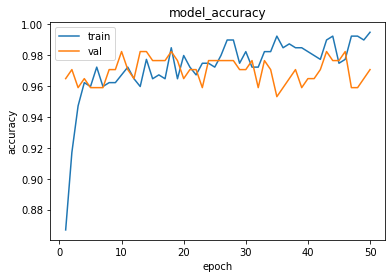

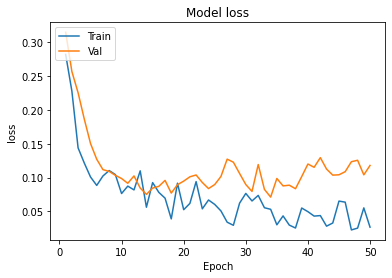

In [ ]:
plot_learningcurve(history,epochs)

In [ ]:
model.evaluate(X_test,Y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9766


[0.08520963788032532, 0.9766082167625427]

In [ ]:
model.evaluate(X_train,Y_train)

13/13 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.9950


[0.013554757460951805, 0.9949748516082764]